In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
last_date

('2017-08-23',)

In [16]:
last_year = (dt.datetime.strptime(last_date[0],'%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
last_year

'2016-08-23'

The date one year from the last date in the data set is 2016-08-23


Text(0, 0.5, 'Precipitation Level (inches)')

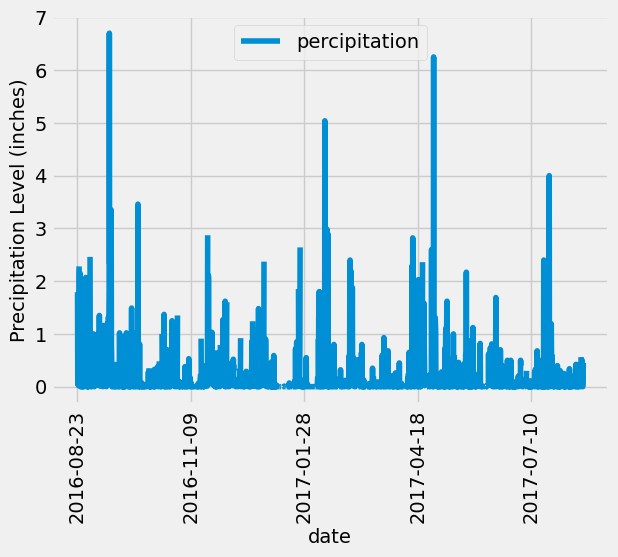

In [81]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = (dt.datetime.strptime(last_date[0],'%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
print(f"The date one year from the last date in the data set is {last_year}")

# Perform a query to retrieve the data and precipitation scores
results_prcp = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= last_year).all()
results_prcp

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(results_prcp, columns = ["date", "percipitation"])


# Sort the dataframe by date
prcp_df.set_index("date", inplace=True)
prcp_df = prcp_df.sort_index()
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
plt = prcp_df.plot(rot=90)
plt.set_ylabel("Precipitation Level (inches)")

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Stations.station)).all()

[(9,)]

In [92]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activity_stations = session.query(Measurements.station, func.count(Measurements.station)).\
                            group_by(Measurements.station).\
                            group_by(Measurements.station).\
                            order_by(func.count(Measurements.station).desc()).all()

activity_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_usc = session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
    filter(Measurements.station == "USC00519281").all()

most_active_usc

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

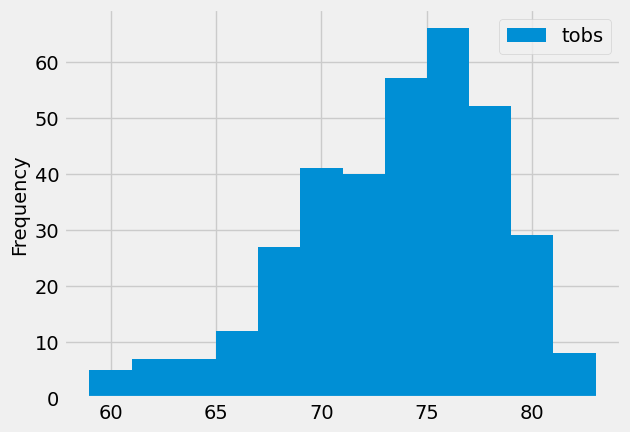

In [106]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281 = session.query(Measurements.date, Measurements.tobs).\
                filter(Measurements.station == "USC00519281").\
                filter(Measurements.date > last_year).all()

USC00519281_df = pd.DataFrame(USC00519281)
USC00519281_df

USC00519281_df.plot(kind = "hist", bins=12)

# Close Session

In [107]:
# Close Session
session.close()